In [222]:
#!wget -O cell_samples.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv

In [195]:
import pandas as pd
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.metrics import classification_report,confusion_matrix,jaccard_score,ConfusionMatrixDisplay,log_loss,f1_score

from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import svm


In [201]:
cell_df = pd.read_csv("cell_samples.csv")
cell_df.sample(5)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
565,1331412,5,7,10,10,5,10,10,10,1,4
503,1265899,4,1,1,1,2,1,3,1,1,2
444,780555,5,1,1,6,3,1,2,1,1,2
175,1200952,5,8,7,7,10,10,5,7,1,4
525,769612,3,1,1,2,2,1,1,1,1,2


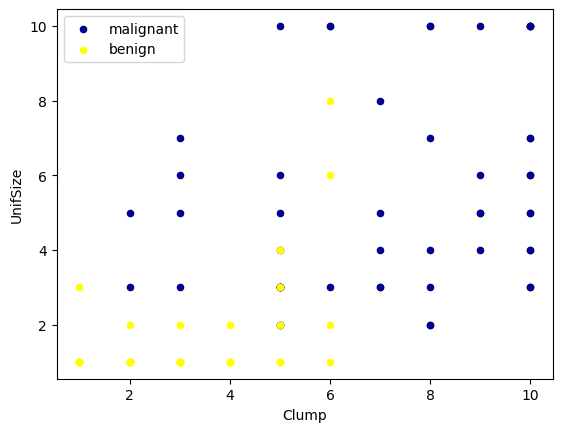

In [202]:
ax = cell_df[cell_df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
cell_df[cell_df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);

In [203]:
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [204]:
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')

<ipython-input-204-81cf72840f8f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')


In [205]:
cell_df

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [206]:
feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)

In [207]:
cell_df['Class'] = cell_df['Class'].astype('int')
y = np.asarray(cell_df['Class'])

In [208]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=818)

In [209]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

In [210]:
yhat = clf.predict(X_test)
yhat[0:10]

array([4, 2, 2, 4, 4, 4, 2, 4, 4, 4])

In [211]:
cnf_matrix = confusion_matrix(y_test, yhat)

print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           2       1.00      0.98      0.99        92
           4       0.96      1.00      0.98        45

    accuracy                           0.99       137
   macro avg       0.98      0.99      0.98       137
weighted avg       0.99      0.99      0.99       137



In [212]:
cnf_matrix

array([[90,  2],
       [ 0, 45]])

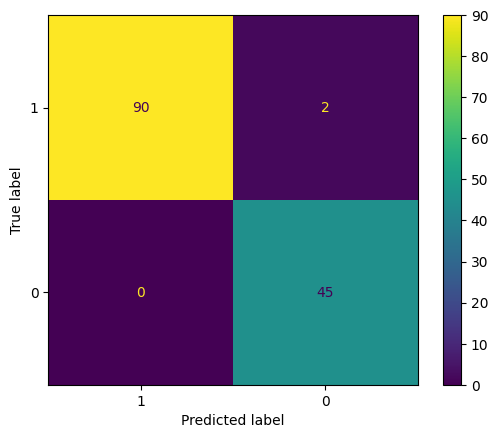

In [213]:
disp = ConfusionMatrixDisplay(cnf_matrix,display_labels=[1,0])
disp.plot()

In [223]:
jaccard_score(y_test, yhat, pos_label=2)

0.9782608695652174

In [219]:
jaccard_score(y_test, yhat, pos_label=2)

0.9782608695652174